In [40]:
import measurement_utile

data_storage = measurement_utile.SampleBucket("data/NANDs_Falling")
data_storage.load_sample_index()
samples_list = data_storage.query_samples()


In [41]:
edges = [[], [], []]

for sample_name in samples_list:
    voltage_trace = data_storage.query_sample(sample_name)

    trigger_edge = measurement_utile.detect_edges(measurement_utile.extrat_binary(voltage_trace[1], HIGH_LEVEL=3.5), voltage_trace[0], edge="rf")[-1]

    edges[0].append(measurement_utile.detect_edges(measurement_utile.extrat_binary(voltage_trace[2], HIGH_LEVEL=3.5), voltage_trace[0], edge="rf")[-1] - trigger_edge)
    edges[1].append(measurement_utile.detect_edges(measurement_utile.extrat_binary(voltage_trace[3], HIGH_LEVEL=3.5), voltage_trace[0], edge="rf")[-1] - trigger_edge)
    edges[2].append(measurement_utile.detect_edges(measurement_utile.extrat_binary(voltage_trace[4], HIGH_LEVEL=3.5), voltage_trace[0], edge="rf")[-1] - trigger_edge)


with open(data_storage.path + "/IC_info.json", "r") as f:
    CHANNEL_MAPPING = measurement_utile.json.loads(f.read())["Channel_mapping"]



IC-Name   : Max      : Min      : Average
CD4093BE  : 62.00 n  : 53.00 n  : 57.93 n  
U74HC00   : 14.00 n  :  6.00 n  : 11.03 n  
SN74HCT00 : 15.00 n  :  8.00 n  : 12.40 n  


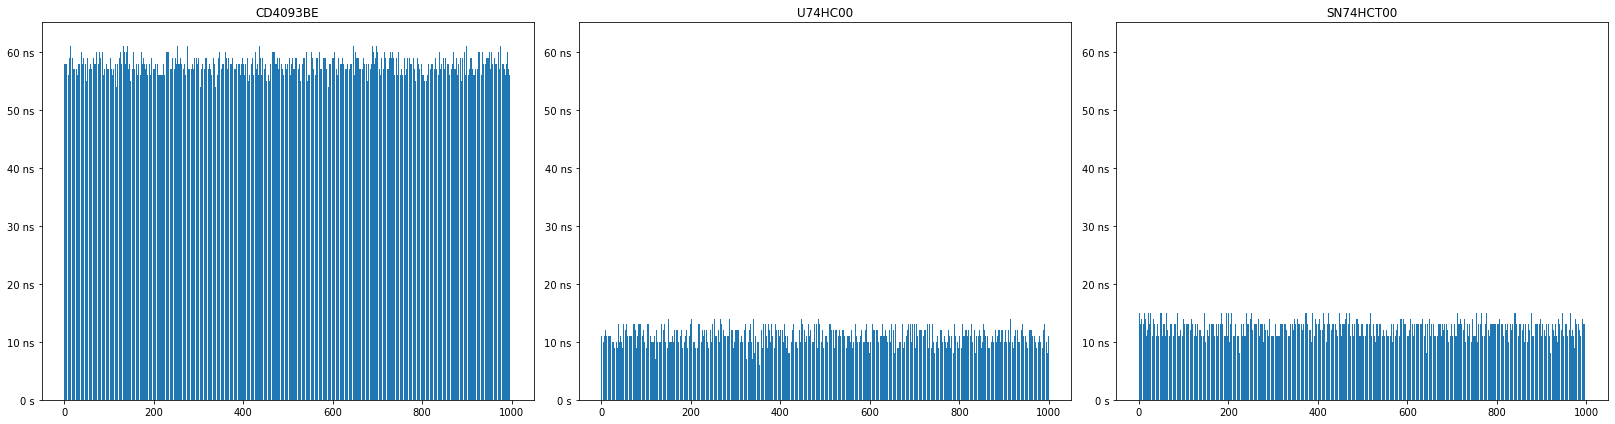

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.subplots(figsize=(30, 6))

last_ax = None

print("IC-Name   : Max      : Min      : Average")

for i in range(3):
    plt.subplot(1, 4, i+1)
    plt.title(CHANNEL_MAPPING[i])
    ax = plt.gca()
    fig = plt.gcf()
    fig.tight_layout()
    ax.yaxis.set_major_formatter(measurement_utile.formatter_time)
    if last_ax:
        ax.sharey(last_ax)
    plt.bar([i for i in range(len(edges[i]))], edges[i])
    last_ax = ax

    print(CHANNEL_MAPPING[i].ljust(10) + ": " + 
        measurement_utile.format_metric_units(max(edges[i])).ljust(9) + ": " +
        measurement_utile.format_metric_units(min(edges[i])).ljust(9) + ": " +
        measurement_utile.format_metric_units(sum(edges[i])/len(edges[i])).ljust(9))

plt.show()